In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv, det, norm
import scipy
from scipy.special import gamma, factorial
from mpl_toolkits import mplot3d

#**Gaussian distribution**

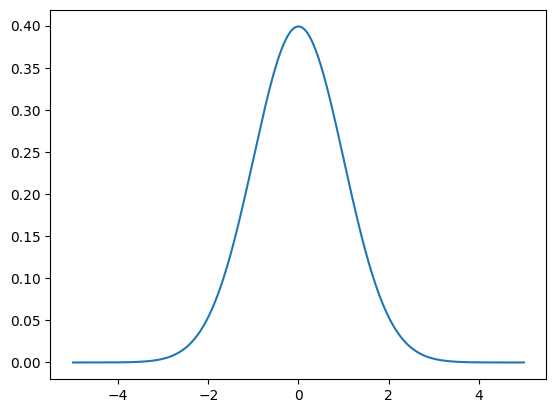

In [ ]:
mu = 0
sigma = 1

x = np.linspace(-5, 5, 1000)
Gaussian = (2 * np.pi * sigma**2)**-0.5  *  np.e ** (-1/2 / sigma**2 * (x-mu)**2)
plt.plot(x, Gaussian)
plt.show()

# **Student's t distribution**

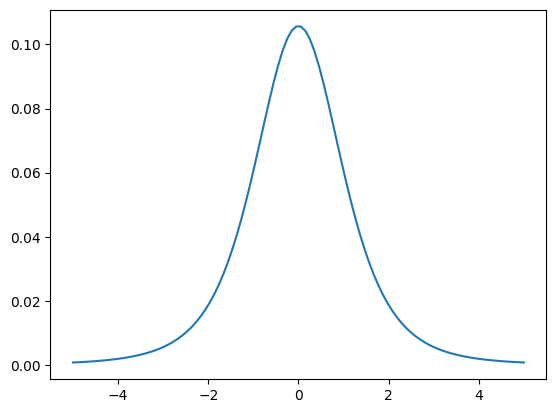

In [ ]:
mu = 0
lambda_ = 1
v = 4

x = np.linspace(-5, 5, 100)
St = gamma(v/2 + 1/2) / gamma(v/2)  *  (lambda_ / (np.pi*v))  *  (1 + lambda_/v*(x-mu)**2)**(-v/2-1/2)
plt.plot(x, St)
plt.show()

In [ ]:
mean = np.mean(St)
variance = ((St - mean) ** 2).sum()

print(mean)
print(variance)

0.03204141583795854
1.4080229768952421


#**Multivariate gaussian**

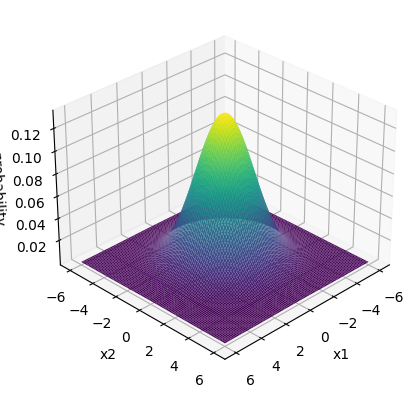

In [ ]:
def gaussian_multi(x, mu, covariance):
  x = np.vstack((x[0].ravel(), x[1].ravel()))
  exponent = -1/2 * np.sum((x - mu).T @ inv(covariance) * (x - mu).T, axis=1)
  return (1 / (2 * np.pi * det(covariance))**0.5 * np.e ** exponent).reshape(100, 100)

x = [np.linspace(-6, 6, 100), np.linspace(-6, 6, 100)]
mu = [[0], [0]]
covariance = [[3, 0], [0, 3]]

X1, X2 = np.meshgrid(x[0], x[1])
Prob = gaussian_multi(np.meshgrid(x[0], x[1]), mu, covariance)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Prob, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.view_init(30, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('probability');

#**Mixture of Gaussians**

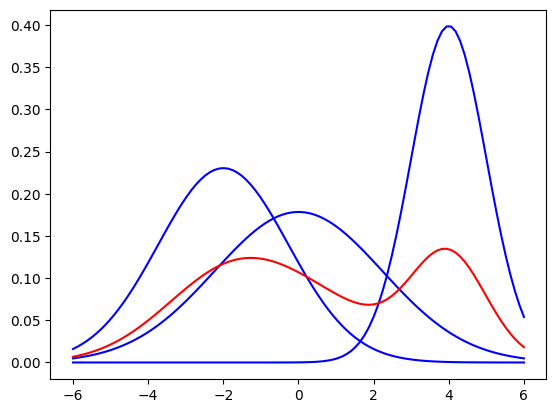

In [ ]:
def gaussian(x, mu, variance):
    return 1 / (2 * np.pi * variance)**0.5 * np.e ** (-1/(2 * variance) * (x-mu)**2)

x = np.linspace(-6, 6, 100)
mu1 = -2
mu2 = 4
mu3 = 0
variance1 = 3
variance2 = 1
variance3 = 5

gaussian1 = gaussian(x, mu1, variance1)
gaussian2 = gaussian(x, mu2, variance2)
gaussian3 = gaussian(x, mu3, variance3)
pi1 = 0.3
pi2 = 0.3
pi3 = 0.4
mixture = pi1 * gaussian1 + pi2 * gaussian2 + pi3 * gaussian3

plt.plot(x, gaussian1, 'b')
plt.plot(x, gaussian2, 'b')
plt.plot(x, gaussian3, 'b')
plt.plot(x, mixture, 'r')
plt.show()

#**von Mises distribution**

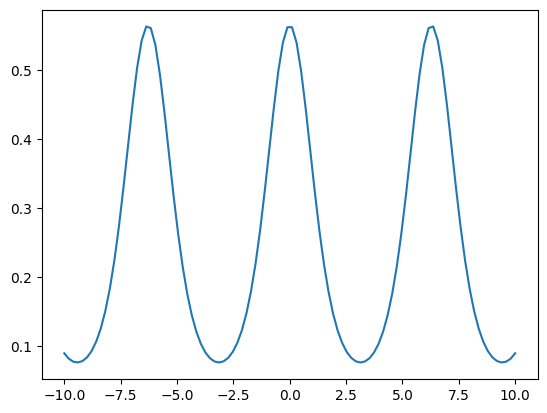

In [ ]:
theta = np.linspace(-10, 10, 100)
theta_0 = 0
m = 1
def I_0(m):
  return scipy.special.jv(0, m)

prob = 1 / (2 * np.pi * I_0(m)) * np.e ** (m * np.cos(theta - theta_0))
plt.plot(theta, prob)
plt.show()

#**Bayesian Linear Regression**

given that

$p(\mathbf{t}|\mathbf{w}) = \mathcal{N}(\mathbf{t}|\mathbf{w}^T\mathbf{\Phi}, \beta^{-1} I)$

$p(\mathbf{w}) = \mathcal{N}(\mathbf{w}|\mathbf{m_0}, \mathbf{S_0})$

We know the posterior:

$p(\mathbf{w} | \mathbf{t}) = \mathcal{N}(\mathbf{w}|\mathbf{m_N}, \mathbf{S_N})$

$\mathbf{m_N} = \mathbf{S_N}(\mathbf{S_0}^{-1}\mathbf{m_0} + \beta\mathbf{\Phi}^T \mathbf{t})$

$\mathbf{S_N}^{-1} = \mathbf{S_0} + \beta \mathbf{\Phi}^T \mathbf{\Phi}$


<ipython-input-73-399772e2d16b>:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-1, 1, 0.1)
<ipython-input-73-399772e2d16b>:19: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-1, 1, 0.1)
<ipython-input-73-399772e2d16b>:25: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-1, 1, 0.1)
<ipython-input-73-399772e2d16b>:26: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-1, 1, 0.1)


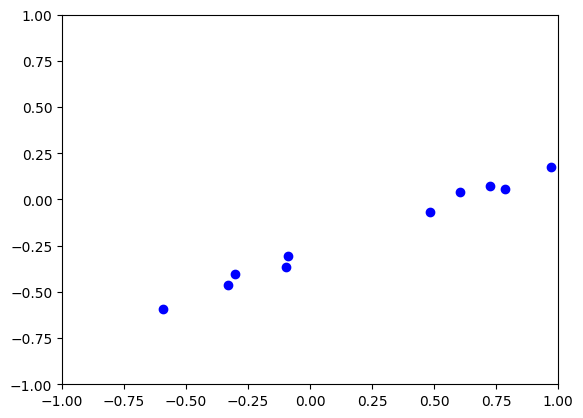

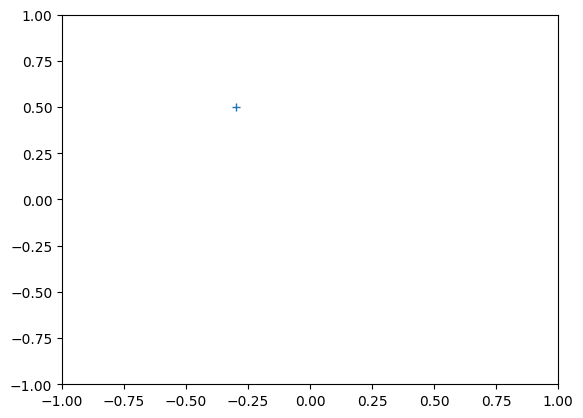

In [ ]:
alpha = 2.0
beta = 25
# hyperparameters are supposed to be known

# the target function is y = -0.3 + 0.5x
a0 = -0.3
a1 = 0.5

def getTrainData():
  x = np.random.uniform(-1, 1, 1)
  y = a0 + x * a1
  # add variance
  y = np.random.normal(y, 1/beta, 1)
  return x, y


plt.figure(1)
plt.xlim(-1, 1, 0.1)
plt.ylim(-1, 1, 0.1)
for i in range(0, 10):
  targetX, targetY = getTrainData()
  plt.plot(targetX, targetY, 'bo')

plt.figure(2)
plt.xlim(-1, 1, 0.1)
plt.ylim(-1, 1, 0.1)
plt.plot(a0, a1, "+")

plt.show()

In [ ]:
m = np.array([[0], [0]])
S = np.array([[1/alpha, 0], [0, 1/alpha]])
initialized = False
phi = -1
t = -1

def gaussian_multi(x, mu, covariance):
  x = np.vstack((x[0].ravel(), x[1].ravel()))
  exponent = -1/2 * np.sum((x - mu).T @ inv(covariance) * (x - mu).T, axis=1)
  return (1 / (2 * np.pi * det(covariance))**0.5 * np.e ** exponent).reshape(100, 100)

def drawModelDisribution():
  x1 = np.linspace(-1, 1, 100)
  x2 = np.linspace(-1, 1, 100)
  Prob = gaussian_multi(np.meshgrid(x1, x2), m, S)

  X1, X2 = np.meshgrid(x1, x2)
  cs = plt.contourf(X1, X2, Prob)

def SampleModel():
  x, y = np.random.multivariate_normal([m[0][0], m[1][0]], S, 1).T
  return x, y

def getModelData():
  w0, w1 = SampleModel()
  x = np.random.uniform(-1, 1, 1)
  y = w0 + x * w1
  y = np.random.normal(y, 1/beta, 1)
  return x, y

def PlotModelLine():
  w0, w1 = SampleModel()

  x = np.linspace(-1, 1, 100)
  y = w0 + x * w1
  plt.plot(x, y, 'g')

def UpdateModel():
  global m, S, phi, t, initialized

  # Observe a data
  x, y = getTrainData();
  if not initialized:
    initialized = True
    phi = np.array([[1], x]).T # 1 * 2
    t = np.array([y])
  else:
    # Use all the data (One step update)
    # phi = np.concatenate((phi, np.array([[1], x]).T), axis=0)
    # t = np.concatenate((t, np.array([y])), axis=0)       # target is y

    # Use the observed data only (Sequential update)
    initialized = True
    phi = np.array([[1], x]).T # 1 * 2
    t = np.array([y])

  # Update
  S_0 = np.array(S)
  m_0 = np.array(m)
  S = inv(inv(S_0) + beta * np.transpose(phi) @ phi)
  m = S @ (inv(S_0) @ m_0 + beta * np.transpose(phi) @ t)

  # print("x", x)
  # print("y", y)
  # print("phi", phi)
  # print("t", t)
  # print("S", S)
  # print("m", m)
  # print("====================")


def DrawResultGraphs():
  plt.figure(1)
  plt.xlim(-1, 1, 0.1)
  plt.ylim(-1, 1, 0.1)
  for i in range(0, 10):
    predictX, predictY = getModelData()
    plt.plot(predictX, predictY, 'ro')

  plt.figure(2)
  plt.xlim(-1, 1, 0.1)
  plt.ylim(-1, 1, 0.1)
  for i in range(0, 10):
    PlotModelLine()
  if initialized:
    for i in range(0, t.shape[0]):
      plt.plot(phi[i][1], t[i][0], 'bo')

  plt.figure(3)
  drawModelDisribution()

<ipython-input-90-2a14e7243f00>:75: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-1, 1, 0.1)
<ipython-input-90-2a14e7243f00>:76: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-1, 1, 0.1)
<ipython-input-90-2a14e7243f00>:82: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-1, 1, 0.1)
<ipython-input-90-2a14e7243f00>:83: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-1, 1, 0.1)


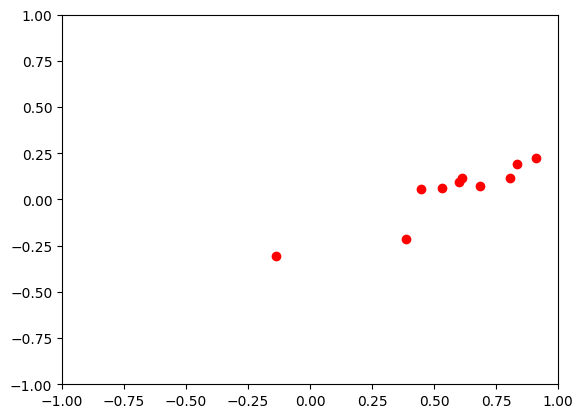

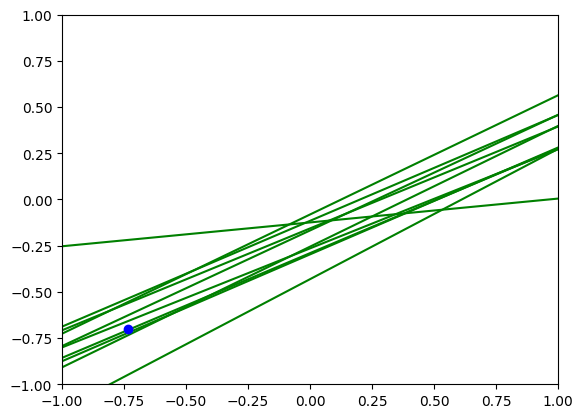

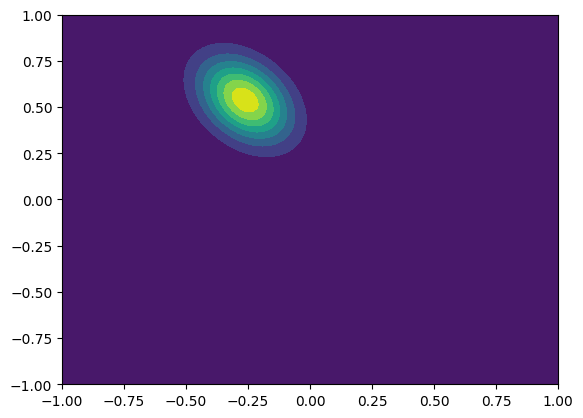

In [ ]:
DrawResultGraphs()
UpdateModel()

#**Predictive Distribution**

The predictive distribution is given by:

$p(t|\mathbf{x}, \mathbf{t}, \alpha, \beta) = \mathcal{N}(t|\mathbf{m}_N^T \mathbf{\Phi}, \sigma^2)$

$\sigma^2 = \frac{1}{\beta} + \mathbf{\Phi}^T \mathbf{S}_N \mathbf{\Phi}$

(100, 1)
(100, 1)
(2, 100)
(2, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)


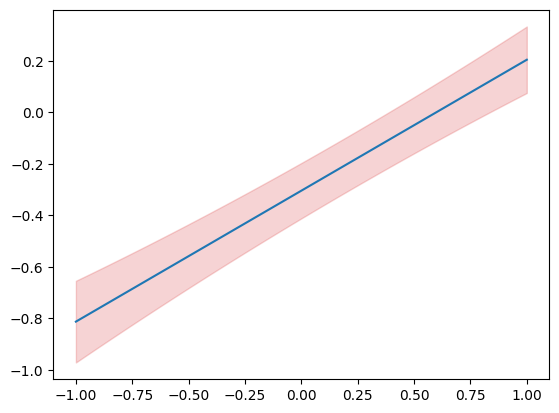

In [ ]:
x = np.linspace(-1, 1, 100)
x = np.expand_dims(x, axis=1)
phi = np.concatenate((np.ones((100, 1)), x), axis=1).T
mu = (m.T @ phi).T
# Predictive mean
plt.plot(x, mu)

sigma = 1 / beta + np.diag(phi.T @ S @ phi)
mu = np.squeeze(mu, axis=1) # squeeze because plt.fill_between only supports 1 dimensionsl vectors
x = np.squeeze(x, axis=1)
# Predictive variance
plt.fill_between(x, mu - 2 * sigma, mu + 2 * sigma, color="tab:red", alpha=0.2)

#**Evidence Approximation**

#*Posterior*
given that

$p(\mathbf{t}|\mathbf{w}) = \mathcal{N}(\mathbf{t}|\mathbf{w}^T\mathbf{\Phi}, \beta^{-1} I)$

$p(\mathbf{w}) = \mathcal{N}(\mathbf{w}|0, \alpha^{-1}\mathbf{I})$

We know the posterior:

$p(\mathbf{w} | \mathbf{t}) = \mathcal{N}(\mathbf{w}|\mathbf{m_N}, \mathbf{S_N})$

$\mathbf{m_N} = \beta\mathbf{S_N}\mathbf{\Phi}^T \mathbf{t}$

$\mathbf{S_N}^{-1} = \alpha\mathbf{I} + \beta \mathbf{\Phi}^T \mathbf{\Phi}$

#*Log Evidence*

$ln(p(\mathbf{t} | \alpha, \beta)) = \frac{M}{2}ln \alpha + \frac{N}{2} ln\beta - E(\mathbf{m_N}) - \frac{1}{2}ln |\mathbf{A}| - \frac{N}{2}ln(2\pi)$

$E(\mathbf{m_N}) = \frac{\beta}{2} ||\mathbf{t} - \mathbf{\Phi}\mathbf{m}_N||^2 + \frac{\alpha}{2}\mathbf{m}_N^T\mathbf{m}_N$

$\mathbf{A} = \alpha\mathbf{I} + \beta \mathbf{\Phi}^T \mathbf{\Phi} = \mathbf{S_N}^{-1}$

<ipython-input-50-43d7a3125b65>:17: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-6, 6, 0.1)
<ipython-input-50-43d7a3125b65>:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-100, 80, 0.1)


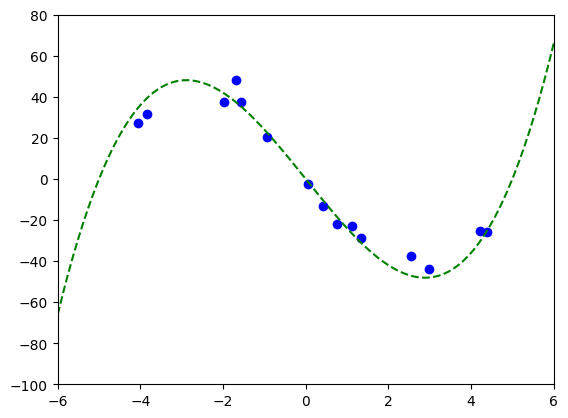

In [ ]:
# Precision for training data
sampleSize = 15

x_train = np.random.uniform(-5, 5, sampleSize)
y_train = x_train * (x_train-5) * (x_train+5) + np.random.normal(0, 1/0.15, x_train.shape) # y = x(x-5)(x+5)
# sigma = 1/0.15
# sigma^2 = (1/0.15)^2
# real_beta = 1 / sigma^2 = (0.15)^2
real_beta = (0.15)**2

def plotTrainingFunction():
  x = np.linspace(-6, 6, 100)
  y = x * (x-5) * (x+5)
  plt.plot(x, y, 'g--')

plt.figure(1)
plt.xlim(-6, 6, 0.1)
plt.ylim(-100, 80, 0.1)
# plot training data
plt.plot(x_train, y_train, 'bo')
# plot training function
plotTrainingFunction()

<ipython-input-51-efb4319fcd46>:44: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-6, 6, 0.1)
<ipython-input-51-efb4319fcd46>:45: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-100, 80, 0.1)


Text(0, 0.5, 'Model Evidence ')

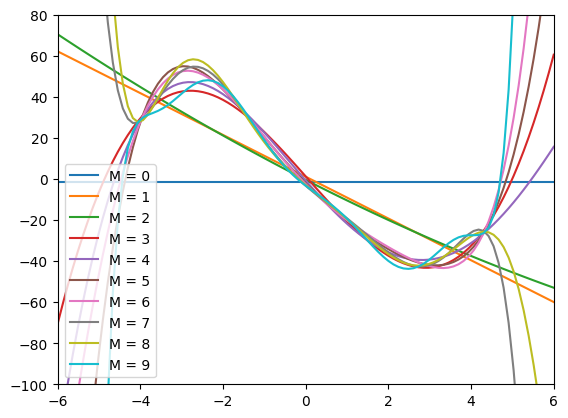

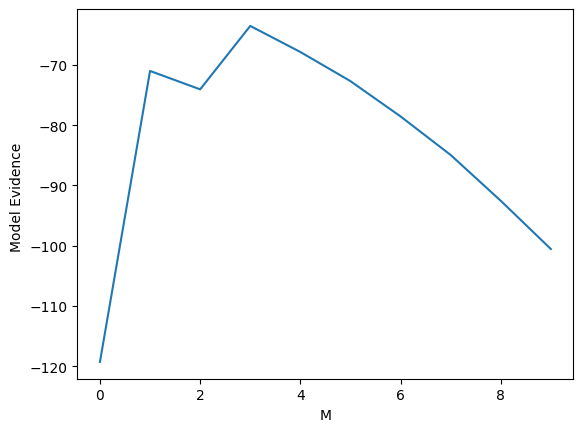

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.e ** (-x))

# xx = np.linspace(-10, 10, 100)
# plt.plot(xx, sigmoid(xx))

# gaussian basis functions
s = 0.2
def gaussian(x, mu, sigma = s):
  return (2 * np.pi * sigma**2)**-0.5  *  np.e ** (-1/2 / sigma**2 * (x-mu)**2)

# polynomial basis functions
def polynomial(x, degrees):
    return np.concatenate([x**i for i in degrees], axis = 1)

def getPhi(x, mu):
  # expand x and mu
  # each x corresponds to 4 mus
  # there will be 100 groups of phis, each corresponds to an x
  # each group will have M=4 phis

  # Phi = gaussian(x[:, np.newaxis], mu[np.newaxis, :])

  degrees = np.array([i for i in range(0, mu.shape[0]+1)])
  Phi = polynomial(x[:, np.newaxis], degrees)
  return Phi

def getPosterior(phi, t, alpha, beta):
  S = inv(alpha * np.eye(phi.shape[1]) + beta * phi.T @ phi)
  m = beta * S @ phi.T @ t
  return m, S

def getLogEvidence(M, N, alpha, beta, S, m, t, phi):
  A = inv(S)
  E = beta/2 * norm(t - phi @ m)**2 + alpha/2 * m.T @ m
  return M/2 * np.log(alpha) + N/2 * np.log(beta) - E - 1/2 * np.log(det(A)) - N/2 * np.log(2 * np.pi)



model_parameter_sizes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
log_evidence = []

plt.figure(1)
plt.xlim(-6, 6, 0.1)
plt.ylim(-100, 80, 0.1)
for M in model_parameter_sizes:
  # M components. N samples
  N = sampleSize
  M = M
  alpha = 0.01
  beta = 0.01

  x = np.linspace(-6, 6, 100)

  mu = np.linspace(0, 1, M)
  phi = getPhi(x_train, mu)


  mN, SN = getPosterior(phi, y_train, alpha, beta)
  plt.plot(x, getPhi(x, mu) @ mN, label = "M = "+str(M))
  plt.legend()

  log_evidence.append(getLogEvidence(M+1, N, alpha, beta, SN, mN, y_train, phi))

plt.figure(2)
plt.plot(model_parameter_sizes, log_evidence)
plt.xlabel('M')
plt.ylabel('Model Evidence ')

#*Hyperparameters*

$(\beta \Phi^T \Phi) u_i = \lambda_i u_i$

$A u_i = (\alpha I + \beta \Phi^T \Phi) u_i = (\alpha + \lambda_i) u_i$

$\gamma = \sum_{i}^{} \frac{\lambda_i}{\alpha + \lambda_i}$

$\alpha_{new} = \frac{\gamma}{\mathbf{m_N}^T\mathbf{m_N}}$

$\frac{1}{\beta_{new}} = \frac{1}{N-\gamma} \sum_{n=1}^{N} \{t_n - \mathbf{m_N}^T\phi(x_n)\}^2$

<ipython-input-80-6949b26dd233>:15: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-6, 6, 0.1)
<ipython-input-80-6949b26dd233>:16: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-100, 80, 0.1)


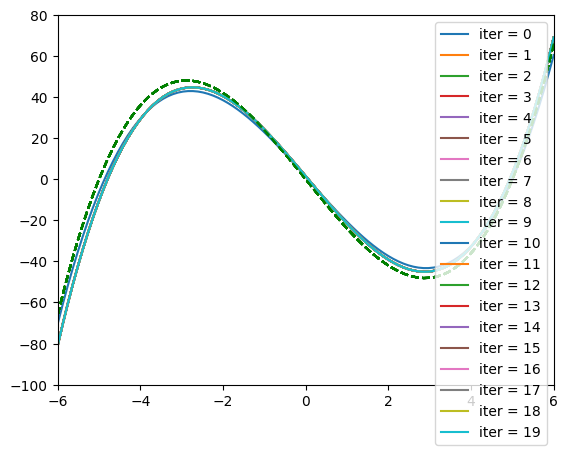

In [ ]:
def getLambda(beta, phi):
  return beta * np.linalg.eig(phi.T @ phi)[0]

def getGamma(alpha, _lambda):
  return (_lambda / (alpha + _lambda)).sum()

def getAlpha(gamma, m):
  return gamma / (m.T @ m)

def getBeta(gamma, m, phi, t, N):
  return 1 / (1 / (N - gamma) * ((t - phi @ m)**2).sum())


plt.figure(1)
plt.xlim(-6, 6, 0.1)
plt.ylim(-100, 80, 0.1)

log_evidence = []
alpha = [0.01]
beta = [0.01]

for i in range(0, 20):
  N = sampleSize
  M = 3

  x = np.linspace(-6, 6, 100)

  mu = np.linspace(0, 1, M)
  phi = getPhi(x_train, mu)

  mN, SN = getPosterior(phi, y_train, alpha[-1], beta[-1])
  plt.plot(x, getPhi(x, mu) @ mN, label = "iter = "+str(i))
  plotTrainingFunction()
  plt.legend()

  log_evidence.append(getLogEvidence(M+1, N, alpha[-1], beta[-1], SN, mN, y_train, phi))

  _lambda = getLambda(beta[-1], phi)
  gamma = getGamma(alpha[-1], _lambda)
  # update alpha
  newAlpha = getAlpha(gamma, mN)
  # update beta
  newBeta = getBeta(gamma, mN, phi, y_train, N)

  alpha.append(newAlpha)
  beta.append(newBeta)


In [ ]:
print(alpha)
print(beta)
print(log_evidence)
print(real_beta)

[0.01, 0.007376207579642308, 0.006883062882855881, 0.006863202957811448, 0.006862768369177647, 0.00686275920930089, 0.006862759016399163, 0.006862759012336817, 0.006862759012251289, 0.006862759012249457, 0.006862759012249444]
[0.01, 0.035353304510530245, 0.0391201059763726, 0.039166669481389776, 0.039167563773417666, 0.0391675825645083, 0.039167582960212104, 0.03916758296854527, 0.039167582968720735, 0.03916758296872447, 0.03916758296872455]
[-63.52037352002147, -60.04909514332292, -60.016333988819994, -60.0163215442828, -60.0163215387549, -60.01632153875245, -60.01632153875246, -60.01632153875244, -60.01632153875245, -60.01632153875245]
0.0225


#*Effective number of parameters*

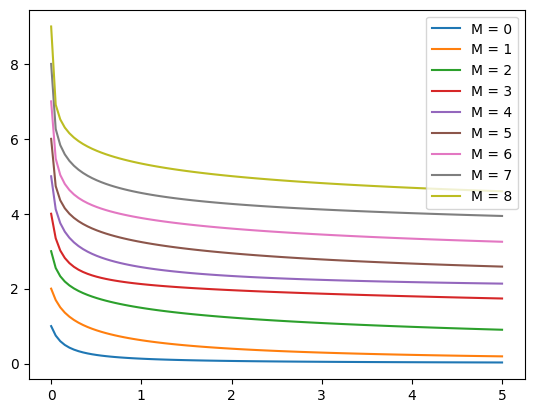

In [ ]:
beta = 0.01
for M in range(0, 9):
  alpha = np.linspace(0, 5, 100)
  N = sampleSize
  M = M

  mu = np.linspace(0, 1, M)
  phi = getPhi(x_train, mu)

  _lambda = getLambda(beta, phi)
  gamma = []
  for a in alpha:
    gamma.append(getGamma(a, _lambda))

  plt.plot(alpha, gamma, label = "M = " + str(M))

  plt.legend()